In [7]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '5a198df4-c32d-46a0-8957-61f1e6de419a',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-09-26T14:47:56.090Z', 'error_code': 0, 'error_message': None, 'elapsed': 21, 'credit_count': 1, 'notice': None, 'total_count': 9078}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10478, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [8]:
import pandas as pd

In [9]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\AlyssaUrban\AppData\Local\Temp\ipykernel_10324\644439384.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


id         name symbol                  slug  num_market_pairs  \
0       1      Bitcoin    BTC               bitcoin             10478   
1    1027     Ethereum    ETH              ethereum              7438   
2     825  Tether USDt   USDT                tether             62831   
3    1839          BNB    BNB                   bnb              1639   
4      52          XRP    XRP                   xrp              1098   
5    3408         USDC   USDC              usd-coin             14230   
6    2010      Cardano    ADA               cardano               939   
7      74     Dogecoin   DOGE              dogecoin               800   
8    5426       Solana    SOL                solana               531   
9    1958         TRON    TRX                  tron               840   
10  11419      Toncoin    TON               toncoin               150   
11   4943          Dai    DAI  multi-collateral-dai              2620   
12   6636     Polkadot    DOT          polkadot-new               588   
13   3890      Polygon  MATIC               polygon               967   
14      2     Litecoin    LTC              litecoin              1003   

                  date_added  \
0   2010-07-13T00:00:00.000Z   
1   2015-08-07T00:00:00.000Z   
2   2015-02-25T00:00:00.000Z   
3   2017-07-25T00:00:00.000Z   
4   2013-08-04T00:00:00.000Z   
5   2018-10-08T00:00:00.000Z   
6   2017-10-01T00:00:00.000Z   
7   2013-12-15T00:00:00.000Z   
8   2020-04-10T00:00:00.000Z   
9   2017-09-13T00:00:00.000Z   
10  2021-08-26T13:40:22.000Z   
11  2019-11-22T00:00:00.000Z   
12  2020-08-19T00:00:00.000Z   
13  2019-04-28T00:00:00.000Z   
14  2013-04-28T00:00:00.000Z   

                                                 tags    max_supply  \
0   [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1   [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2   [payments, stablecoin, asset-backed-stablecoin...           NaN   
3   [marketplace, centralized-exchange, payments, ...           NaN   
4   [medium-of-exchange, enterprise-solutions, arr...  1.000000e+11   
5   [medium-of-exchange, stablecoin, asset-backed-...           NaN   
6   [dpos, pos, platform, research, smart-contract...  4.500000e+10   
7   [mineable, pow, scrypt, medium-of-exchange, me...           NaN   
8   [pos, platform, solana-ecosystem, cms-holdings...           NaN   
9   [media, payments, tron-ecosystem, dwf-labs-por...           NaN   
10  [pos, ftx-bankruptcy-estate, dwf-labs-portfoli...           NaN   
11  [defi, stablecoin, asset-backed-stablecoin, et...           NaN   
12  [substrate, polkadot, binance-chain, polkadot-...           NaN   
13  [pos, platform, enterprise-solutions, zero-kno...  1.000000e+10   
14        [mineable, pow, scrypt, medium-of-exchange]  8.400000e+07   

    circulating_supply  total_supply  ...  quote.USD.market_cap_dominance  \
0         1.949649e+07  1.949649e+07  ...                         48.9446   
1         1.202324e+08  1.202324e+08  ...                         18.2752   
2         8.320788e+10  8.642620e+10  ...                          7.9746   
3         1.538471e+08  1.538471e+08  ...                          3.1185   
4         5.324524e+10  9.998841e+10  ...                          2.5608   
5         2.561575e+10  2.561575e+10  ...                          2.4561   
6         3.512466e+10  3.619858e+10  ...                          0.8267   
7         1.411661e+11  1.411661e+11  ...                          0.8201   
8         4.128773e+08  5.584592e+08  ...                          0.7614   
9         8.910848e+10  8.910860e+10  ...                          0.7235   
10        3.431892e+09  5.047559e+09  ...                          0.7141   
11        5.347889e+09  5.347889e+09  ...                          0.5125   
12        1.232452e+09  1.359694e+09  ...                          0.4746   
13        9.319469e+09  1.000000e+10  ...                          0.4630   
14        7.369617e+07  8.400000e

In [10]:
def api_runner(): 
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
    }
    headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '5a198df4-c32d-46a0-8957-61f1e6de419a',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)
  

In [11]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60)
exit()

{'status': {'timestamp': '2023-09-26T14:48:18.744Z', 'error_code': 0, 'error_message': None, 'elapsed': 11, 'credit_count': 1, 'notice': None, 'total_count': 9078}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10478, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\AlyssaUrban\AppData\Local\Temp\ipykernel_10324\3429388932.py:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


NameError: name 'df2' is not defined

In [13]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [14]:
df

id         name symbol                  slug  num_market_pairs  \
0       1      Bitcoin    BTC               bitcoin             10478   
1    1027     Ethereum    ETH              ethereum              7438   
2     825  Tether USDt   USDT                tether             62831   
3    1839          BNB    BNB                   bnb              1639   
4      52          XRP    XRP                   xrp              1098   
5    3408         USDC   USDC              usd-coin             14230   
6    2010      Cardano    ADA               cardano               939   
7      74     Dogecoin   DOGE              dogecoin               800   
8    5426       Solana    SOL                solana               531   
9    1958         TRON    TRX                  tron               840   
10  11419      Toncoin    TON               toncoin               150   
11   4943          Dai    DAI  multi-collateral-dai              2620   
12   6636     Polkadot    DOT          polkadot-new               588   
13   3890      Polygon  MATIC               polygon               967   
14      2     Litecoin    LTC              litecoin              1003   

                  date_added  \
0   2010-07-13T00:00:00.000Z   
1   2015-08-07T00:00:00.000Z   
2   2015-02-25T00:00:00.000Z   
3   2017-07-25T00:00:00.000Z   
4   2013-08-04T00:00:00.000Z   
5   2018-10-08T00:00:00.000Z   
6   2017-10-01T00:00:00.000Z   
7   2013-12-15T00:00:00.000Z   
8   2020-04-10T00:00:00.000Z   
9   2017-09-13T00:00:00.000Z   
10  2021-08-26T13:40:22.000Z   
11  2019-11-22T00:00:00.000Z   
12  2020-08-19T00:00:00.000Z   
13  2019-04-28T00:00:00.000Z   
14  2013-04-28T00:00:00.000Z   

                                                 tags         max_supply  \
0   [mineable, pow, sha-256, store-of-value, state...     21000000.00000   
1   [pos, smart-contracts, ethereum-ecosystem, coi...                NaN   
2   [payments, stablecoin, asset-backed-stablecoin...                NaN   
3   [marketplace, centralized-exchange, payments, ...                NaN   
4   [medium-of-exchange, enterprise-solutions, arr... 100000000000.00000   
5   [medium-of-exchange, stablecoin, asset-backed-...                NaN   
6   [dpos, pos, platform, research, smart-contract...  45000000000.00000   
7   [mineable, pow, scrypt, medium-of-exchange, me...                NaN   
8   [pos, platform, solana-ecosystem, cms-holdings...                NaN   
9   [media, payments, tron-ecosystem, dwf-labs-por...                NaN   
10  [pos, ftx-bankruptcy-estate, dwf-labs-portfoli...                NaN   
11  [defi, stablecoin, asset-backed-stablecoin, et...                NaN   
12  [substrate, polkadot, binance-chain, polkadot-...                NaN   
13  [pos, platform, enterprise-solutions, zero-kno...  10000000000.00000   
14        [mineable, pow, scrypt, medium-of-exchange]     84000000.00000   

    circulating_supply       total_supply  ...  \
0       19496487.00000     19496487.00000  ...   
1      120232366.36038    120232366.36038  ...   
2    83207883380.70059  86426198724.99622  ...   
3      153847136.07052    153847136.07052  ...   
4    53245240268.00000  99988414766.00000  ...   
5    25615745416.57117  25615745416.57117  ...   
6    35124664414.20600  36198584811.42400  ...   
7   141166056383.70520 141166056383.70520  ...   
8      412877336.97490    558459215.48376  ...   
9    89108479452.80119  89108602443.74565  ...   
10    3431892087.62000   5047558528.00000  ...   
11    5347888595.74641   5347888595.74641  ...   
12    1232452337.09214   1359693999.99732  ...   
13    9319469069.28493  10000000000.00000  ...   
14      73696170.47744     84000000.00000  ...   

    quote.USD.market_cap_dominance  quote.USD.fully_diluted_market_cap  \
0                         48.94460                  550009087818.93994   
1                         18.27520                  190634611444.39999   
2                          7.97460                   86403390342.14000   
3          

In [16]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d','quote.USD.percent_change_30d', 'quote.USD.percent_change_60d']].mean()

In [17]:
df3

quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
name                                                                     
Bitcoin                         -0.16316                       0.20521   
Ethereum                        -0.13980                       0.65676   
Tether USDt                      0.00674                       0.01252   
BNB                             -0.28746                       1.39631   
XRP                              0.04305                       0.96729   
USDC                             0.01302                       0.02891   
Cardano                         -0.11437                       0.53149   
Dogecoin                        -0.19828                      -0.36986   
Solana                          -0.38275                      -1.45800   
TRON                            -0.04687                       0.77808   
Toncoin                         -0.06907                       0.73400   
Dai                             -0.02642                      -0.00043   
Polkadot                         0.15336                      -0.79020   
Polygon                         -0.25052                       0.81372   
Litecoin                        -0.32043                      -0.42620   

             quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
name                                                                     
Bitcoin                         -3.55904                       0.18415   
Ethereum                        -3.57842                      -4.30301   
Tether USDt                     -0.05215                       0.02181   
BNB                             -2.70217                      -3.32374   
XRP                             -1.41334                      -5.22213   
USDC                             0.00224                       0.01276   
Cardano                         -3.96989                      -7.17173   
Dogecoin                        -3.62638                      -4.40974   
Solana                          -3.52398                      -7.74259   
TRON                             0.64449                       9.27239   
Toncoin                        -13.18863                      45.70387   
Dai                             -0.04859                      -0.03378   
Polkadot                        -2.25398                     -11.34160   
Polygon                         -3.86302                      -7.49243   
Litecoin                        -4.96705                      -2.67707   

             quote.USD.percent_change_60d  
name                                       
Bitcoin                         -11.00041  
Ethereum                        -15.49793  
Tether USDt                      -0.01652  
BNB                             -12.71233  
XRP                             -29.79228  
USDC                             -0.00324  
Cardano                         -21.25827  
Dogecoin                        -21.68250  
Solana                          -23.14274  
TRON                              1.00931  
Toncoin                          66.59026  
Dai                              -0.02960  
Polkadot                        -23.48862  
Polygon                         -27.90357  
Litecoin                        -30.07020

In [20]:
df4 = df3.stack()
df4

name                                  
Bitcoin   quote.USD.percent_change_1h     -0.16316
          quote.USD.percent_change_24h     0.20521
          quote.USD.percent_change_7d     -3.55904
          quote.USD.percent_change_30d     0.18415
          quote.USD.percent_change_60d   -11.00041
                                            ...   
Litecoin  quote.USD.percent_change_1h     -0.32043
          quote.USD.percent_change_24h    -0.42620
          quote.USD.percent_change_7d     -4.96705
          quote.USD.percent_change_30d    -2.67707
          quote.USD.percent_change_60d   -30.07020
Length: 75, dtype: float64

In [22]:
df5 = df4.to_frame(name='values')
df5

values
name                                           
Bitcoin  quote.USD.percent_change_1h   -0.16316
         quote.USD.percent_change_24h   0.20521
         quote.USD.percent_change_7d   -3.55904
         quote.USD.percent_change_30d   0.18415
         quote.USD.percent_change_60d -11.00041
...                                         ...
Litecoin quote.USD.percent_change_1h   -0.32043
         quote.USD.percent_change_24h  -0.42620
         quote.USD.percent_change_7d   -4.96705
         quote.USD.percent_change_30d  -2.67707
         quote.USD.percent_change_60d -30.07020

[75 rows x 1 columns]

In [24]:
index = pd.Index(range(99))
df6 = df5.reset_index()
df6

name                       level_1    values
0    Bitcoin   quote.USD.percent_change_1h  -0.16316
1    Bitcoin  quote.USD.percent_change_24h   0.20521
2    Bitcoin   quote.USD.percent_change_7d  -3.55904
3    Bitcoin  quote.USD.percent_change_30d   0.18415
4    Bitcoin  quote.USD.percent_change_60d -11.00041
..       ...                           ...       ...
70  Litecoin   quote.USD.percent_change_1h  -0.32043
71  Litecoin  quote.USD.percent_change_24h  -0.42620
72  Litecoin   quote.USD.percent_change_7d  -4.96705
73  Litecoin  quote.USD.percent_change_30d  -2.67707
74  Litecoin  quote.USD.percent_change_60d -30.07020

[75 rows x 3 columns]

In [28]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

name                percent_change    values
0    Bitcoin   quote.USD.percent_change_1h  -0.16316
1    Bitcoin  quote.USD.percent_change_24h   0.20521
2    Bitcoin   quote.USD.percent_change_7d  -3.55904
3    Bitcoin  quote.USD.percent_change_30d   0.18415
4    Bitcoin  quote.USD.percent_change_60d -11.00041
..       ...                           ...       ...
70  Litecoin   quote.USD.percent_change_1h  -0.32043
71  Litecoin  quote.USD.percent_change_24h  -0.42620
72  Litecoin   quote.USD.percent_change_7d  -4.96705
73  Litecoin  quote.USD.percent_change_30d  -2.67707
74  Litecoin  quote.USD.percent_change_60d -30.07020

[75 rows x 3 columns]

In [31]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d'],['24h','7d','30d','60d'])
df7

name               percent_change    values
0    Bitcoin  quote.USD.percent_change_1h  -0.16316
1    Bitcoin                          24h   0.20521
2    Bitcoin                           7d  -3.55904
3    Bitcoin                          30d   0.18415
4    Bitcoin                          60d -11.00041
..       ...                          ...       ...
70  Litecoin  quote.USD.percent_change_1h  -0.32043
71  Litecoin                          24h  -0.42620
72  Litecoin                           7d  -4.96705
73  Litecoin                          30d  -2.67707
74  Litecoin                          60d -30.07020

[75 rows x 3 columns]

In [33]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h'],['1h'])
df7

name percent_change    values
0    Bitcoin             1h  -0.16316
1    Bitcoin            24h   0.20521
2    Bitcoin             7d  -3.55904
3    Bitcoin            30d   0.18415
4    Bitcoin            60d -11.00041
..       ...            ...       ...
70  Litecoin             1h  -0.32043
71  Litecoin            24h  -0.42620
72  Litecoin             7d  -4.96705
73  Litecoin            30d  -2.67707
74  Litecoin            60d -30.07020

[75 rows x 3 columns]

In [26]:
import seaborn as sns
import matplotlib.pyplot

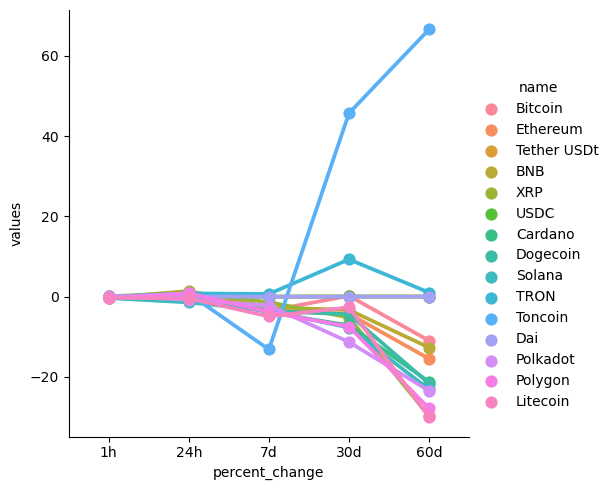

In [34]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [37]:
df10 = df[['name', 'quote.USD.price', 'timestamp']]
df10.query("name =='Bitcoin'")
df10

name  quote.USD.price                  timestamp
0       Bitcoin      26190.90894 2023-09-26 14:48:20.923100
1      Ethereum       1585.55152 2023-09-26 14:48:20.923100
2   Tether USDt          0.99974 2023-09-26 14:48:20.923100
3           BNB        211.44253 2023-09-26 14:48:20.923100
4           XRP          0.50168 2023-09-26 14:48:20.923100
5          USDC          1.00020 2023-09-26 14:48:20.923100
6       Cardano          0.24553 2023-09-26 14:48:20.923100
7      Dogecoin          0.06060 2023-09-26 14:48:20.923100
8        Solana         19.23517 2023-09-26 14:48:20.923100
9          TRON          0.08469 2023-09-26 14:48:20.923100
10      Toncoin          2.17042 2023-09-26 14:48:20.923100
11          Dai          0.99970 2023-09-26 14:48:20.923100
12     Polkadot          4.01681 2023-09-26 14:48:20.923100
13      Polygon          0.51823 2023-09-26 14:48:20.923100
14     Litecoin         64.04052 2023-09-26 14:48:20.923100